In [20]:
import numpy as np
import pandas as pd
import datetime as dt
from pandas_datareader import data as wb
import matplotlib.pyplot as plt

In [21]:
# Datas
inicio = dt.date(2019,1,10)
fim = dt.date(2022,2,2)

In [22]:
# Nome das ações
acoes = ['MGLU3.SA','ABEV3.SA','CIEL3.SA']

# Criamos o DataFrame vazio
new_data = pd.DataFrame()

# Preenchemos o DataFrame com os dados das ações
for a in acoes:
    new_data[a] = wb.DataReader(a, data_source='yahoo', start=inicio)['Adj Close']
    
# Novos nomes das colunas
acao_name = ['Magazine Luiza', 'Ambev', 'Cielo']
new_data.columns = acao_name

In [23]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 763 entries, 2019-01-10 to 2022-02-07
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Magazine Luiza  763 non-null    float64
 1   Ambev           763 non-null    float64
 2   Cielo           763 non-null    float64
dtypes: float64(3)
memory usage: 23.8 KB


In [24]:
new_data.head()

,Magazine Luiza,Ambev,Cielo
Date,,,
2019-01-10,5.485669,15.321994,9.517748
2019-01-11,5.387088,15.722093,9.191621
2019-01-14,5.429553,15.949422,9.354682
2019-01-15,5.367977,16.094913,9.011392
2019-01-16,5.308222,16.185843,8.788253


In [25]:
new_data.tail()

,Magazine Luiza,Ambev,Cielo
Date,,,
2022-02-01,7.01,14.85,2.30
2022-02-02,6.51,14.52,2.33
2022-02-03,6.53,14.46,2.19
2022-02-04,6.31,14.48,2.33
2022-02-07,6.47,14.35,2.36


## Normalizando os dados com base 100

$$
\frac{P_1}{P_0} * 100
$$

In [26]:
# Extrai os dados da primeira linha da tabela
new_data.iloc[0]

Magazine Luiza     5.485669
Ambev             15.321994
Cielo              9.517748
Name: 2019-01-10 00:00:00, dtype: float64

<AxesSubplot:xlabel='Date'>

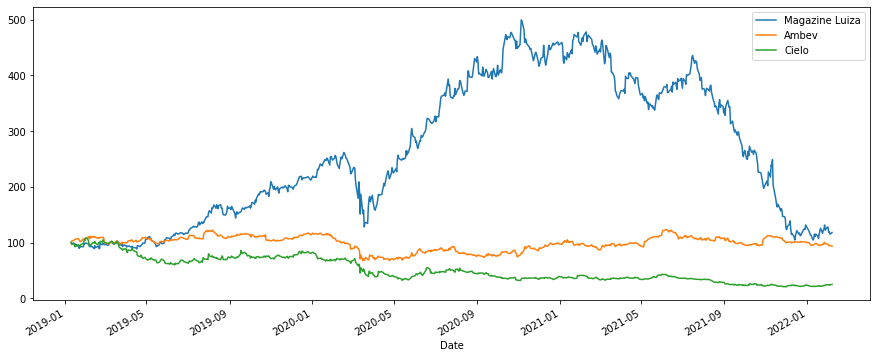

In [27]:
# Pega os dados de 1 data (1 linha da tabela) e multiplica por 100
(new_data / new_data.iloc[0] * 100).plot(figsize=(15,6))

<AxesSubplot:xlabel='Date'>

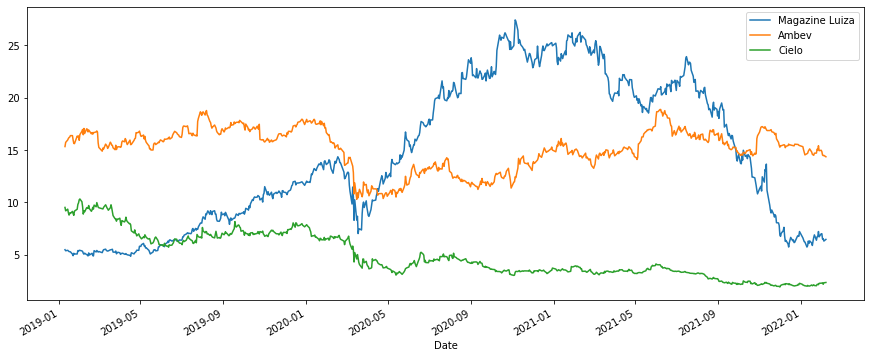

In [28]:
# Plotando todas as variações das ações sem normalizar
new_data.plot(figsize=(15,6))

## Retorno simples da carteira

In [29]:
retorno = (new_data / new_data.shift(1)) - 1
retorno.head()

,Magazine Luiza,Ambev,Cielo
Date,,,
2019-01-10,NaN,NaN,NaN
2019-01-11,-0.017971,0.026113,-0.034265
2019-01-14,0.007883,0.014459,0.017740
2019-01-15,-0.011341,0.009122,-0.036697
2019-01-16,-0.011132,0.005650,-0.024762


In [30]:
# Aplicando técnica da matriz
# Para isso definimos abaixo a % de qtd possuída de cada ação
weights = np.array([0.25, 0.25, 0.25])

In [31]:
# Cálculo de matrizes
np.dot(retorno, weights)

array([            nan, -6.53076277e-03,  1.00205043e-02, -9.72899589e-03,
       -7.56100869e-03,  5.81882160e-03,  2.68424679e-04, -4.81475423e-03,
       -1.96676671e-02,  1.94920775e-03,  8.09228371e-03,  1.62759040e-02,
        2.70643337e-02,  2.38320144e-03,  5.29428788e-03,  1.00740415e-02,
       -4.16757809e-03, -1.11609326e-02, -3.41986542e-02,  1.33029440e-02,
       -4.60683135e-03,  1.07046546e-02, -1.10980713e-03, -1.10913209e-02,
        2.45584323e-02, -1.87093725e-02, -3.93151493e-03,  7.20030475e-03,
       -6.40083499e-03, -4.31672980e-03,  3.63917629e-02, -9.19899952e-03,
        1.88183566e-02, -1.03207056e-02, -2.48347479e-02, -5.89281625e-03,
       -1.35144093e-02,  1.24898744e-02,  7.66452673e-03,  1.67130576e-02,
       -1.00734559e-02, -7.76725079e-03, -6.96722303e-03, -1.26389992e-03,
        1.91716368e-02,  6.06223484e-03, -8.89561640e-03, -9.40369406e-03,
       -2.59989745e-02, -1.20584540e-02,  1.21382744e-02, -2.55532165e-02,
        1.34821351e-02,  

In [32]:
retorno_anual = retorno.mean() * 250
retorno_anual

Magazine Luiza    0.224128
Ambev             0.039541
Cielo            -0.294060
dtype: float64

In [33]:
np.dot(retorno_anual, weights)

-0.007597709115986909

In [34]:
pfolio_1 = str(round(np.dot(retorno_anual, weights), 5) * 100)

In [35]:
print('O retorno anual da carteira de ações composta por '
      'MGLU3, ABEV3 e CIEL3 nos últimos 2 anos foi de: {}%'.format(pfolio_1))

O retorno anual da carteira de ações composta por MGLU3, ABEV3 e CIEL3 nos últimos 2 anos foi de: -0.76%
